In [1]:
from sklearn.svm import SVC #向量分类
from sklearn.datasets import fetch_lfw_people #数据集
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV #帮助选择最优算法，调节参数
from sklearn.decomposition import PCA #对数据降维处理
import logging
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn import svm #svm算法
import sklearn.datasets as datasets #数据集
%matplotlib inline

In [2]:
path = r"./mnist_train_100.csv"
data = pd.read_csv(path)
data.shape

(99, 785)

In [3]:
# 手迹像素信息
images = data.iloc[:, 1:].values
# 标签信息
target = data.iloc[:, :1].values.reshape(-1)

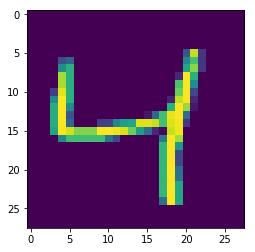

In [4]:
plt.imshow(images[1].reshape(28, 28))

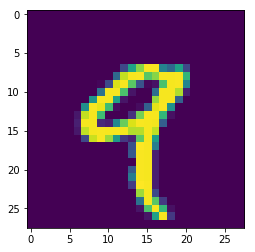

In [5]:
plt.imshow(images[3].reshape(28, 28))

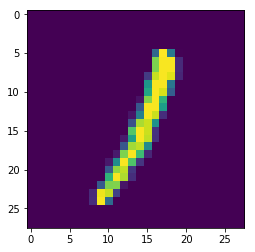

In [7]:
plt.imshow(images[98].reshape(28, 28))

In [8]:
target = data.iloc[:, :1].values.reshape(-1)
target

array([0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3,
       9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6,
       1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0,
       4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=int64)

In [19]:
# 数据集太小了，所以得分不高，同时没有降维也有影响
train_num = 66
test_num = 22
x_train, x_test = images[:train_num], images[-1*test_num:]
y_train, y_test = target[:train_num], target[-1*test_num:]
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.09090909090909091

In [13]:
print(type(svc))

<class 'sklearn.svm.classes.SVC'>


In [14]:
pca = PCA(n_components=0.8, #设置特征值>0.8作为主成分 
          whiten=True #白化
        )
pca.fit(images)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [21]:
x_train_pca = pca.transform(x_train) #降低维度处理
x_test_pca = pca.transform(x_test)

In [22]:
newsvc = SVC()
newsvc.fit(x_train_pca, y_train)
newsvc.score(x_test_pca, y_test)

0.7727272727272727

In [23]:
print(type(newsvc))

<class 'sklearn.svm.classes.SVC'>


In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_pca, y_train)
# 数据预测
knn.score(x_test_pca, y_test)

0.7727272727272727

In [25]:
print(type(knn))

<class 'sklearn.neighbors.classification.KNeighborsClassifier'>


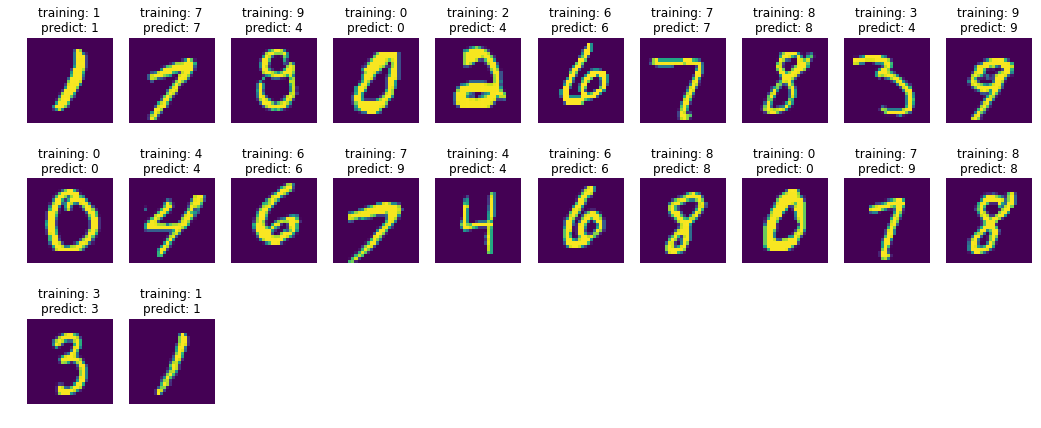

In [31]:
# 绘制50个数据
y_svc = newsvc.predict(x_test_pca)
plt.figure(figsize=(1.8*10, 2.5*5))
for i in range(22):
    plt.subplot(5, 10, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.axis('off')
    result = "training: "+str(y_test[i])+"\n"+"predict: "+str(y_svc[i])
    plt.title(result)
plt.show()

In [32]:
from sklearn.grid_search import GridSearchCV
mx = SVC(kernel='rbf', probability=True) #创建SVC方法，mx用于测试
param_grid = {'C':[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma':[0.001, 0.0001]} #测试的函数
grid_search = GridSearchCV(mx, param_grid, n_jobs=1, verbose=1) #训练自动循环找最优化的参数
grid_search.fit(x_train_pca, y_train) #训练数据
best_parameters = grid_search.best_estimator_.get_params() #寻找最优的参数
mx = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True) #选择最优参数
mx.fit(x_train_pca, y_train) #训练
mx.score(x_test_pca, y_test) #测试评分

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.3s finished


0.9090909090909091